# preprocessing external dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")



first load the external dataset: the events

In [2]:
event_df = pd.read_csv("../raw_data/NYC_Permitted_Event_Information_-_Historical.csv")
event_df

,Event ID,Event Name,Start Date/Time,End Date/Time,Event Agency,Event Type,Event Borough,Event Location,Event Street Side,Street Closure Type,Community Board,Police Precinct
0,368421.0,Big Apple Circus,11/18/2017 07:00:00 PM,11/18/2017 08:00:00 PM,Parks Department,Special Event,Manhattan,"Damrosch Park: Damrosch Park ,Damrosch Park: T...",NaN,NaN,"7,","20,"
1,330050.0,Mt. Eden Farmer's Market,11/16/2017 08:00:00 AM,11/16/2017 04:00:00 PM,Parks Department,Special Event,Bronx,Mount Eden Malls: Mount Eden Malls,NaN,NaN,"4,","44,"
2,314111.0,Columbia Greenmarket Thursday,11/21/2017 08:00:00 AM,11/21/2017 05:00:00 PM,Street Activity Permit Office,Farmers Market,Manhattan,BROADWAY between WEST 114 STREET and WEST 1...,East,Sidewalk and Curb Lane Closure,"9,","26,"
3,369850.0,Lawn Maintenance,11/23/2017 12:00:00 AM,11/23/2017 11:58:00 PM,Parks Department,Construction,Manhattan,Madison Square Park: Center Lawn,NaN,NaN,"5,","13,"
4,335783.0,"October, November December model aircraft flying",11/22/2017 09:00:00 AM,11/22/2017 08:00:00 PM,Parks Department,Special Event,Staten Island,LaTourette Park & Golf Course: Model Airplane ...,NaN,NaN,"2,","122,"
...,...,...,...,...,...,...,...,...,...,...,...,...
11303169,591003.0,Soccer - Non Regulation,08/18/2021 10:30:00 AM,08/18/2021 02:00:00 PM,Parks Department,Sport - Adult,Manhattan,Sara D. Roosevelt Park: Lion's Gate-Soccer-03 ...,NaN,NaN,"03,","5,"
11303170,591003.0,Soccer - Non Regulation,08/19/2021 10:30:00 AM,08/19/2021 02:00:00 PM,Parks Department,Sport - Adult,Manhattan,Sara D. Roosevelt Park: Lion's Gate-Soccer-03 ...,NaN,NaN,"03,","5,"
11303171,591003.0,Soccer - Non Regulation,08/20/2021 10:30:00 AM,08/20/2021 02:00:00 PM,Parks Department,Sport - Adult,Manhattan,Sara D. Roosevelt Park: Lion's Gate-Soccer-03 ...,NaN,NaN,"03,","5,"
11303172,591003.0,Soccer - Non Regulation,08/23/2021 10:30:00 AM,08/23/2021 02:00:00 PM,Parks Department,Sport - Adult,Manhattan,Sara D. Roosevelt Park: Lion's Gate-Soccer-03 ...,NaN,NaN,"03,","5,"


In [6]:
set(event_df["Event Type"])

{'Athletic',
 'Athletic Race / Tour',
 'Block Party',
 'Clean-Up',
 'Commercial Promotional Event',
 'Concert',
 'Construction',
 'DCAS Prep/Shoot/Wrap Permit',
 'Embargo',
 'Farmers Market',
 'Film Shoot / Production',
 'Filming/Photography',
 'Health Fair',
 'Marathon',
 'Miscellaneous',
 'Mobile Unit',
 'Open Culture',
 'Parade',
 'Play Streets',
 'Plaza Event',
 'Plaza Partner Event',
 'Press Conference',
 'Press Conference Media',
 'Production Event',
 'Public Program / Exhibitions',
 'Rally',
 'Red Carpet Event',
 'Religious Event',
 'Rigging Permit',
 'Shooting Permit',
 'Sidewalk Sale',
 'Single Block Festival',
 'Special Event',
 'Sport - Adult',
 'Sport - Youth',
 'Stationary Demonstration',
 'Stickball',
 'Street Event',
 'Street Festival',
 'Theater Load in and Load Outs ',
 'Urban Art Program',
 'Weekend Walk',
 nan}

In [7]:
event_df["Start Date/Time"] = pd.to_datetime(event_df["Start Date/Time"])
event_df["End Date/Time"] = pd.to_datetime(event_df["End Date/Time"])


select events during 2017, 2018 and 2019

In [22]:
selected_event_df = event_df[((pd.DatetimeIndex(event_df["Start Date/Time"]).year == 2017)
                            | (pd.DatetimeIndex(event_df["Start Date/Time"]).year == 2018)
                             | (pd.DatetimeIndex(event_df["Start Date/Time"]).year == 2019))
                            &((pd.DatetimeIndex(event_df["End Date/Time"]).year == 2017)
                            | (pd.DatetimeIndex(event_df["End Date/Time"]).year == 2018)
                             | (pd.DatetimeIndex(event_df["End Date/Time"]).year == 2019))
                            ]


select large gathered outdoor event

In [23]:
selected_event_df = selected_event_df.loc[(selected_event_df["Event Type"] == "Athletic") 
                                    | (selected_event_df["Event Type"] == "Athletic Race / Tour") 
                                    | (selected_event_df["Event Type"] == "Concert") 
                                    | (selected_event_df["Event Type"] == "Farmers Market") 
                                    | (selected_event_df["Event Type"] == "Marathon") 
                                    | (selected_event_df["Event Type"] == "Plaza Event")
                                    | (selected_event_df["Event Type"] == "Public Program / Exhibitions")
                                    | (selected_event_df["Event Type"] == "Religious Event")
                                    | (selected_event_df["Event Type"] == "Sidewalk Sale")
                                    | (selected_event_df["Event Type"] == "Sport - Adult")
                                    | (selected_event_df["Event Type"] == "Sport - Youth")
                                    | (selected_event_df["Event Type"] == "Street Event")
                                    | (selected_event_df["Event Type"] == "Street Festival")
                                    | (selected_event_df["Event Type"] == "Urban Art Program")
                                    | (selected_event_df["Event Type"] == "Weekend Walk")

                                         ]

add start and end month year day columns

In [26]:
selected_event_df["Start Month"] = pd.DatetimeIndex(selected_event_df["Start Date/Time"]).month 
selected_event_df["End Month"] = pd.DatetimeIndex(selected_event_df["End Date/Time"]).month 

selected_event_df["Start Year"] = pd.DatetimeIndex(selected_event_df["Start Date/Time"]).year 
selected_event_df["End Year"] = pd.DatetimeIndex(selected_event_df["End Date/Time"]).year 

selected_event_df["Start Day"] = pd.DatetimeIndex(selected_event_df["Start Date/Time"]).day
selected_event_df["End Day"] = pd.DatetimeIndex(selected_event_df["End Date/Time"]).day 


wanted to count how many event occur during a day for each borough
- the events occure only in a day
- the events take place for more than a day


In [27]:
same_event = selected_event_df.loc[(selected_event_df["Start Year"] == selected_event_df["End Year"])
                                             & (selected_event_df["Start Month"] == selected_event_df["End Month"])
                                             & (selected_event_df["Start Day"] == selected_event_df["End Day"])]

In [28]:
calendar_df = same_event.groupby(["Start Year","Start Month","Start Day","Event Borough"]).size().reset_index(name='Event_Counts')
calendar_df = calendar_df.rename(columns = {"Start Year":"Year","Start Month": "Month","Start Day": "Day","Event Borough":"Borough"})


create the calendar dataframe

In [29]:
def create_calendar(start,end):
    df = pd.DataFrame({"Date":pd.date_range(start,end)})
    df["Year"] = df.Date.dt.year
    df["Month"] = df.Date.dt.month
    df["Day"] = df.Date.dt.day
    return df

In [30]:
Borough = ['Bronx', 'Brooklyn', 'EWR', 'Manhattan', 'Queens', 'Staten Island']



In [31]:
borough_frame = []
for borough_name in Borough:
    df = create_calendar(start = "2017-1-1",end = "2019-12-31")
    df_len = (df.shape)[0]
    Borough_list = [borough_name]* df_len
    df["Borough"] = Borough_list
    borough_frame.append(df)

new_df = pd.concat(borough_frame)
new_df

,Date,Year,Month,Day,Borough
0,2017-01-01,2017,1,1,Bronx
1,2017-01-02,2017,1,2,Bronx
2,2017-01-03,2017,1,3,Bronx
3,2017-01-04,2017,1,4,Bronx
4,2017-01-05,2017,1,5,Bronx
...,...,...,...,...,...
1090,2019-12-27,2019,12,27,Staten Island
1091,2019-12-28,2019,12,28,Staten Island
1092,2019-12-29,2019,12,29,Staten Island
1093,2019-12-30,2019,12,30,Staten Island


merge to get one dataframe shown the the total number of events in each day each borough

In [32]:
calendar_df = pd.DataFrame(pd.merge(new_df,calendar_df, how = "left",on=["Year","Month","Day","Borough"])).fillna(0)
calendar_df

,Date,Year,Month,Day,Borough,Event_Counts
0,2017-01-01,2017,1,1,Bronx,0.0
1,2017-01-02,2017,1,2,Bronx,0.0
2,2017-01-03,2017,1,3,Bronx,0.0
3,2017-01-04,2017,1,4,Bronx,0.0
4,2017-01-05,2017,1,5,Bronx,0.0
...,...,...,...,...,...,...
6565,2019-12-27,2019,12,27,Staten Island,0.0
6566,2019-12-28,2019,12,28,Staten Island,124.0
6567,2019-12-29,2019,12,29,Staten Island,93.0
6568,2019-12-30,2019,12,30,Staten Island,0.0


for event occur more than a day

In [33]:
different_event = selected_event_df.loc[(selected_event_df["Start Year"] != selected_event_df["End Year"])
                                             | (selected_event_df["Start Month"] != selected_event_df["End Month"])
                                             | (selected_event_df["Start Day"] != selected_event_df["End Day"])]

In [34]:
for index,row in different_event.iterrows():
    duration = (row["End Date/Time"] - row["Start Date/Time"]).days
    Year = row["Start Year"]
    Month = row["Start Month"]
    Day = row["Start Day"]
    borough = row["Event Borough"]
    cal_index = calendar_df.index[(calendar_df["Year"] == Year)
                                  & (calendar_df["Month"] == Month)
                                  & (calendar_df["Day"] == Day)
                                  & (calendar_df["Borough"] == borough)].to_list()[0]
   
    for i in range (cal_index, cal_index + duration + 1):
        calendar_df.loc[i].at["Event_Counts"] += 1
        
        
        
calendar_df      

,Date,Year,Month,Day,Borough,Event_Counts
0,2017-01-01,2017,1,1,Bronx,0.0
1,2017-01-02,2017,1,2,Bronx,0.0
2,2017-01-03,2017,1,3,Bronx,0.0
3,2017-01-04,2017,1,4,Bronx,0.0
4,2017-01-05,2017,1,5,Bronx,0.0
...,...,...,...,...,...,...
6565,2019-12-27,2019,12,27,Staten Island,0.0
6566,2019-12-28,2019,12,28,Staten Island,124.0
6567,2019-12-29,2019,12,29,Staten Island,93.0
6568,2019-12-30,2019,12,30,Staten Island,0.0


save the file

In [35]:
calendar_df.to_csv("../preprocessed_data/calendar.csv")

give a plot to select the corresponding taxi data

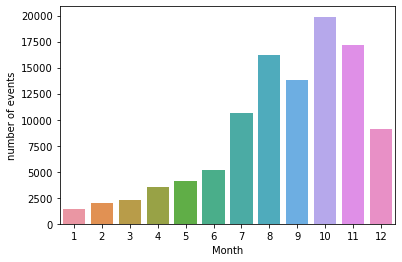

In [36]:
select_calendar_df = calendar_df.loc[~(calendar_df["Year"] == 2019)]
counts_df = select_calendar_df.groupby(["Month"],as_index=False)["Event_Counts"].sum()
sns_plot = sns.barplot(x = "Month",y = "Event_Counts",data = counts_df)

sns_plot.set(xlabel='Month', ylabel='number of events')
fig = sns_plot.get_figure()
fig.savefig("../plots/events_17&18.png")
plt.show()

from the plot shown above, August, September, and October are the top 3 frequent event months in 2017 and 2018

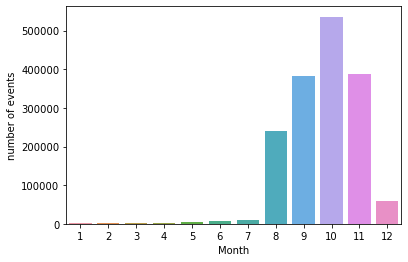

In [37]:
test_calendar_df = calendar_df.loc[(calendar_df["Year"] == 2019)]
counts_df = test_calendar_df.groupby(["Month"],as_index=False)["Event_Counts"].sum()
sns_plot = sns.barplot(x = "Month",y = "Event_Counts",data = counts_df)

sns_plot.set(xlabel='Month', ylabel='number of events')
fig = sns_plot.get_figure()
fig.savefig("../plots/events_19.png")
plt.show()